In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv("./data/19zpallnoagi.csv")
df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,N02300,A02300,N02500,A02500,N26270,A26270,N02900,A02900,N03220,A03220,N03300,A03300,N03270,A03270,N03150,A03150,N03210,A03210,N04450,A04450,N04100,A04100,N04200,A04200,N04470,A04470,A00101,N17000,A17000,N18425,A18425,N18450,A18450,N18500,A18500,N18800,A18800,N18460,A18460,N18300,A18300,N19300,A19300,N19500,A19500,N19530,A19530,N19570,A19570,N19700,A19700,N20950,A20950,N04475,A04475,N04800,A04800,N05800,A05800,N09600,A09600,N05780,A05780,N07100,A07100,N07300,A07300,N07180,A07180,N07230,A07230,N07240,A07240,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2100740.00,914850.00,743250.00,395440.00,1925700.00,75480.00,1116020.00,1434160.00,4085710.00,31000.00,22690.00,8310.00,4490.00,414360.00,511240.00,130815070.00,2100670.00,132129733.00,1760950.00,91213539.00,552680.00,1100308.00,268270.00,2122402.00,245060.00,1609924.00,76450.00,90443.00,359160.00,3374570.00,231930.00,4881146.00,186930.00,3420409.00,424560.00,11155464.00,38620.00,34990.00,107337.00,327590.00,4991389.00,86660.00,7018482.00,463380.00,1314663.00,43800.00,11260.00,4400.00,116134.00,34650.00,275100.00,19590.00,93986.00,139600.00,155085.00,1931320.00,33805170.00,1931270.00,33154524.00,327750.00,647390.00,166360.00,5909478.00,34290184.00,45810.00,654479.00,133920.00,1214226.00,23680.00,42843.00,136710.00,335791.00,110740.00,46929.00,159670.00,1006379.00,164780.00,1045271.00,122240.00,1294464.00,720.00,5859.00,5110.00,2848.00,5900.00,64815.00,147810.00,2343223.00,7070.00,127247.00,229930.00,1509419.00,1617000.00,91874439.00,1615690.00,15030269.00,380.00,4636.00,34500.00,37929.00,797610.00,1482959.00,69820.00,65687.00,95670.00,55005.00,119770.00,128328.00,154010.00,29858.00,576980.00,1089134.00,23690.00,26485.00,253170.00,695726.00,78910.00,672888.00,85930.00,731410.00,2007350.00,17896016.00,486090.00,1348466.00,443720.00,1209646.00,356250.00,621805.00,116190.00,105274.00,23950.00,17716.00,1329580.00,13520654.00,1469630.00,14554116.00,30540.00,50703.00,39520.00,141384.00,418210.00,1875183.00,1633620.00,5232476.00,1603620.00,4711318.00,32340.00,463956.00
1,1,AL,35004,0,5330.00,2310.00,2060.00,840.00,4910.00,200.00,2440.00,3740.00,10360.00,30.00,30.00,0.00,0.00,990.00,1230.00,315055.00,5330.00,317526.00,4620.00,259009.00,1360.00,1408.00,580.00,1410.00,510.00,986.00,250.00,263.00,750.00,5915.00,460.00,3056.00,490.00,7078.00,960.00,21538.00,0.00,70.00,267.00,800.00,11021.00,140.00,4915.00,1270.00,2471.00,130.00,32.00,0.00,0.00,50.00,367.00,60.00,207.00,590.00,695.00,4950.00,88349.00,4950.00,86718.00,840.00,1632.00,400.00,10517.00,44806.00,120.00,1606.00,340.00,1783.00,40.00,68.00,330.00,378.00,280.00,90.00,380.00,2038.00,390.00,2067.00,320.00,2382.00,0.00,0.00,0.00,0.00,0.00,0.00,350.00,3875.00,0.00,0.00,510.00,1961.00,4380.00,219380.00,4390.00,30230.00,0.00,0.00,120.00,148.00,2030.00,4335.00,90.00,5.00,410.00,244.00,300.00,334.00,370.00,67.00,1590.00,3533.00,60.00,69.00,520.00,1177.00,190.00,1870.00,220.00,2051.00,5130.00,35790.00,820.00,1925.00,710.00,1691.00,650.00,1112.00,240.00,197.00,50.00,40.00,3850.00,25896.00,4090.00,27425.00,30.00,18.00,20.00,30.00,1120.00,2718.00,4120.00,11050.00,4060.00,10414.00,70.00,320.00
2,1,AL,35005,0,3280.00,1520.00,800.00,900.00,2980.00,120.00,1670.00,2470.00,6060.00,40.00,40.00,0.00,0.00,920.00,750.00,133950.00,3280.00,134803.00,2800.00,109801.00,460.00,417.00,150.00,217.00,130.00,149.00,140.00,117.00,520.00,81.00,100.00,173.00,230.00,3112.00,610.00,13464.00,0.00,50.00,148.00,470.00,5354.00,30.00,279.00,540.00,853.00,50.00,13.00,0.00,0.00,0.00,0

In [3]:
df.shape

(27695, 152)

since we are pay attention to income, im going use just STATE, ZIPCODE, A00100(Adjust gross income (AGI)), N02650(Number of returns with total income) and A02650(Total income amount) columns. also we removed zipcode 00000 and 99999 rows. because zipcode 00000 means that aggregations for that state (sum) and 99999 means, from the source: "ZIP codes with less than 100 returns and those identified as a single building or nonresidential ZIP code were categorized as “other” (99999)." -- TODO: continue *******

I will continue analysis comparing both strategies like, just using the A02650(Total income amount) column and using  A00100(Adjust gross income (AGI)), N02650(Number of returns with total income) and A02650(Total income amount) columns to how well clustering applied to dataset and choose one of the strategie.

In [4]:
df_income = df[(df["ZIPCODE"]!=0) & (df["ZIPCODE"]!=99999)].iloc[:,list(range(1, 3)) + list(range(19, 22))]
df_income.rename(columns={"A00100": "ADJUSTED_GROSS_INCOME", "N02650": "TOTAL_INCOME_RETURN", "A02650": "TOTAL_INCOME_AMOUNT"}, inplace=True)
df_income.head()

,STATE,ZIPCODE,ADJUSTED_GROSS_INCOME,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT
1,AL,35004,315055.00,5330.00,317526.00
2,AL,35005,133950.00,3280.00,134803.00
3,AL,35006,67289.00,1230.00,67693.00
4,AL,35007,756173.00,12380.00,763960.00
5,AL,35010,459471.00,8090.00,463806.00


some feature engineering

In [5]:
df_income["MEAN_TOTAL_INCOME"] = df_income["TOTAL_INCOME_AMOUNT"] / df_income["TOTAL_INCOME_RETURN"]
df_income.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIPCODE,27593.00,48856.24,27047.66,1001.00,27105.00,48845.00,70578.00,99901.00
ADJUSTED_GROSS_INCOME,27593.00,428488.35,723203.13,1306.00,32745.00,118192.00,533730.00,12229642.00
TOTAL_INCOME_RETURN,27593.00,5510.11,7310.86,90.00,600.00,1990.00,8020.00,59000.00
TOTAL_INCOME_AMOUNT,27593.00,433438.17,731859.73,1306.00,33118.00,119539.00,539463.00,12331790.00
MEAN_TOTAL_INCOME,27593.00,69.83,55.67,12.70,48.23,57.57,72.88,3296.83


In [10]:
df_income_three_column = df_income.copy()
df_income_one_column = df_income.loc[:, ["STATE", "ZIPCODE","TOTAL_INCOME_AMOUNT"]]

In [12]:
df_income_one_column.head()

,STATE,ZIPCODE,TOTAL_INCOME_AMOUNT
1,AL,35004,317526.00
2,AL,35005,134803.00
3,AL,35006,67693.00
4,AL,35007,763960.00
5,AL,35010,463806.00


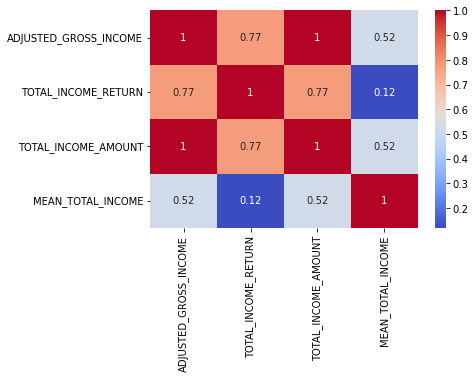

In [13]:
sns.heatmap(df_income_three_column.iloc[:,2:].corr(), cmap="coolwarm", annot=True);

since ADJUSTED_GROSS_INCOME and TOTAL_INCOME_AMOUNT highly correlated we can use one of them or apply pca and transform into one feature or maybe averaging two of them into one feature. im gonna just drop ADJUSTED_GROSS_INCOME column.

In [14]:
df_income_three_column.drop(columns="ADJUSTED_GROSS_INCOME", inplace=True)
df_income_three_column.head()

,STATE,ZIPCODE,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT,MEAN_TOTAL_INCOME
1,AL,35004,5330.00,317526.00,59.57
2,AL,35005,3280.00,134803.00,41.10
3,AL,35006,1230.00,67693.00,55.03
4,AL,35007,12380.00,763960.00,61.71
5,AL,35010,8090.00,463806.00,57.33


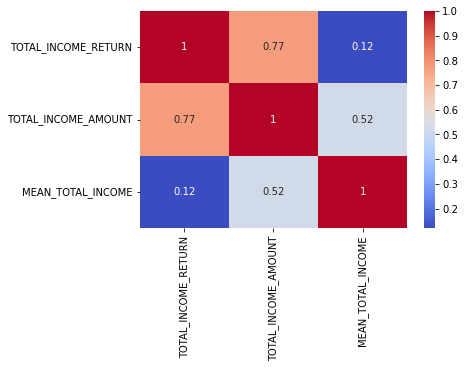

In [15]:
sns.heatmap(df_income_three_column.iloc[:,2:].corr(), cmap="coolwarm", annot=True);


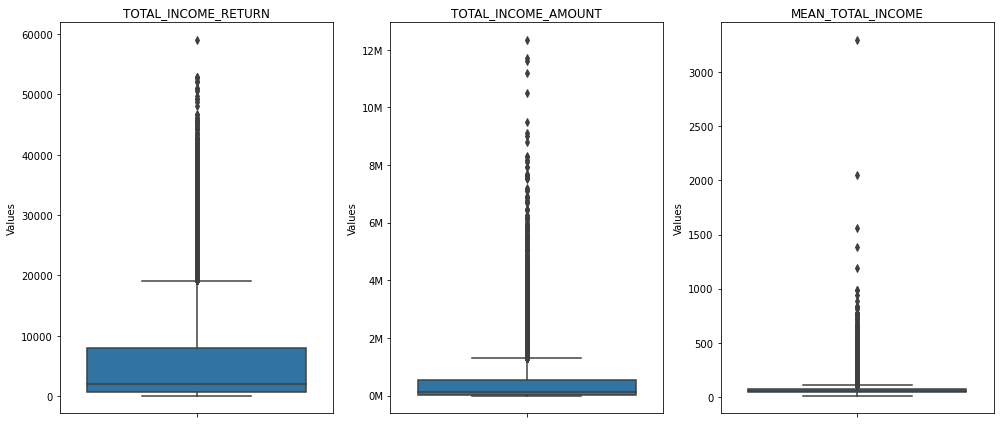

In [16]:
columns_to_plot = ['TOTAL_INCOME_RETURN', 'TOTAL_INCOME_AMOUNT', 'MEAN_TOTAL_INCOME']

# Create subplots in a grid for the specified columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

# Plot each column's boxplot in a separate subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df_income_three_column[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

    # Check if the maximum value in the column is greater than or equal to 1e7 (10 million)
    if df_income_three_column[column].max() >= 1e7:
        axes[i].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))  # Format in millions

plt.tight_layout()
plt.show()

c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


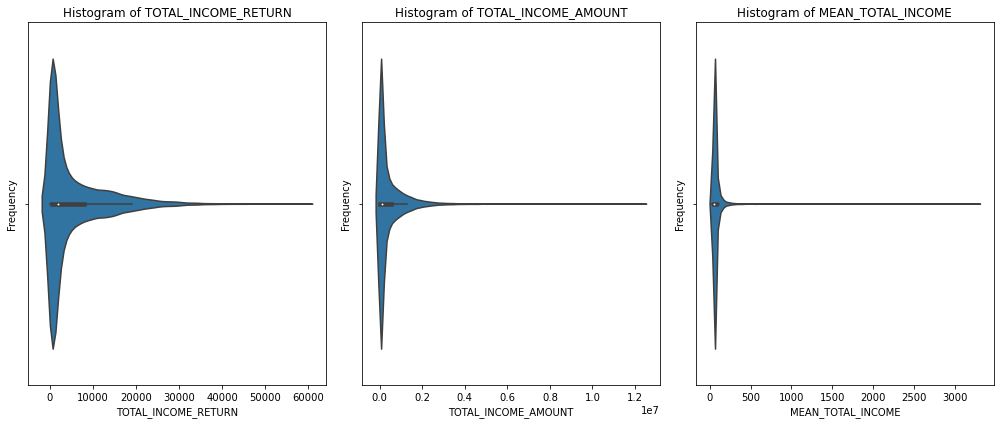

In [17]:

# Create subplots in a grid
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.violinplot(df_income_three_column[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

since the data does not follow normal distribution we should use min-max normalization for modelling both strategies

we just need income related columns for modelling so we use them.

In [18]:
df_income_one_column.head()

,STATE,ZIPCODE,TOTAL_INCOME_AMOUNT
1,AL,35004,317526.00
2,AL,35005,134803.00
3,AL,35006,67693.00
4,AL,35007,763960.00
5,AL,35010,463806.00


In [31]:
df_model_three_column = df_income_three_column.loc[:, ['TOTAL_INCOME_RETURN', 'TOTAL_INCOME_AMOUNT', 'MEAN_TOTAL_INCOME']]
df_model_one_column = df_income_one_column.loc[:, ['TOTAL_INCOME_AMOUNT']]


In [33]:
df_model_three_column.isna().sum()

TOTAL_INCOME_RETURN    0
TOTAL_INCOME_AMOUNT    0
MEAN_TOTAL_INCOME      0
dtype: int64

In [34]:
df_model_one_column.isna().sum()


TOTAL_INCOME_AMOUNT    0
dtype: int64

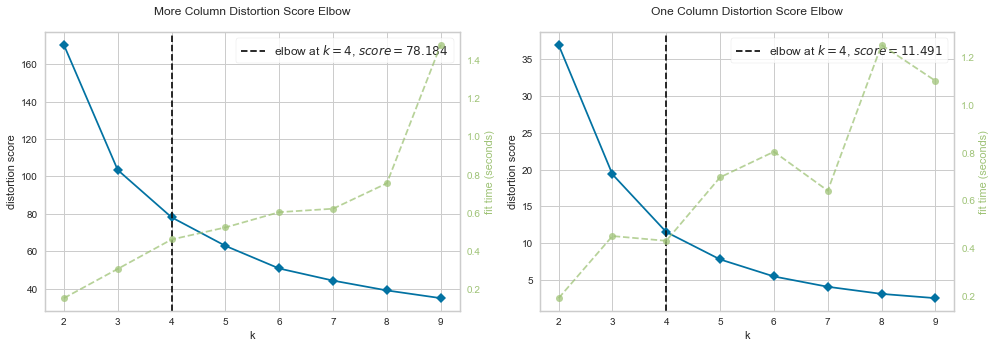

In [36]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

def kmeans(df_model_three_column, df_model_one_column):
    scaler = MinMaxScaler()
    
    # Model with more columns
    df_scaled_more_column = scaler.fit_transform(df_model_three_column)
    ssd_1 = []
    for k in range(2, 11):
        model_1 = KMeans(n_clusters=k)
        model_1.fit(df_scaled_more_column)
        ssd_1.append(model_1.inertia_)
    
    # Model with fewer columns
    df_scaled_one_column = scaler.fit_transform(df_model_one_column)
    ssd_2 = []
    for k in range(2, 11):
        model_2 = KMeans(n_clusters=k)
        model_2.fit(df_scaled_one_column)
        ssd_2.append(model_2.inertia_)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    elbow_score_1 = KElbowVisualizer(KMeans(random_state=42, max_iter=500), k=(2, 10), ax=axes[0])
    elbow_score_1.fit(df_scaled_more_column)
    elbow_score_1.finalize()
    elbow_score_1.ax.set_title('More Column Distortion Score Elbow\n')

    elbow_score_2 = KElbowVisualizer(KMeans(random_state=42, max_iter=500), k=(2, 10), ax=axes[1])
    elbow_score_2.fit(df_scaled_one_column)
    elbow_score_2.finalize()
    elbow_score_2.ax.set_title('One Column Distortion Score Elbow\n')
    
    plt.tight_layout()
    plt.show()

# Call the function and pass your DataFrames
kmeans(df_model_three_column, df_model_one_column)

for both strategies k=4 looks best

In [38]:
df_income.head()

,STATE,ZIPCODE,ADJUSTED_GROSS_INCOME,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT,MEAN_TOTAL_INCOME
1,AL,35004,315055.00,5330.00,317526.00,59.57
2,AL,35005,133950.00,3280.00,134803.00,41.10
3,AL,35006,67289.00,1230.00,67693.00,55.03
4,AL,35007,756173.00,12380.00,763960.00,61.71
5,AL,35010,459471.00,8090.00,463806.00,57.33


In [37]:
df_model_three_column.head()

,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT,MEAN_TOTAL_INCOME
1,5330.00,317526.00,59.57
2,3280.00,134803.00,41.10
3,1230.00,67693.00,55.03
4,12380.00,763960.00,61.71
5,8090.00,463806.00,57.33


In [40]:
df[(df["ZIPCODE"]!=0) & (df["ZIPCODE"]!=99999)].iloc[:,1:3]


,STATE,ZIPCODE
1,AL,35004
2,AL,35005
3,AL,35006
4,AL,35007
5,AL,35010
...,...,...
27689,WY,83123
27690,WY,83126
27691,WY,83127
27692,WY,83128


In [ ]:
df_state_zipcode = df[(df["ZIPCODE"]!=0) & (df["ZIPCODE"]!=99999)].iloc[:,1:3]


In [49]:
df_income_one_column.head()

,STATE,ZIPCODE,TOTAL_INCOME_AMOUNT
1,AL,35004,317526.00
2,AL,35005,134803.00
3,AL,35006,67693.00
4,AL,35007,763960.00
5,AL,35010,463806.00


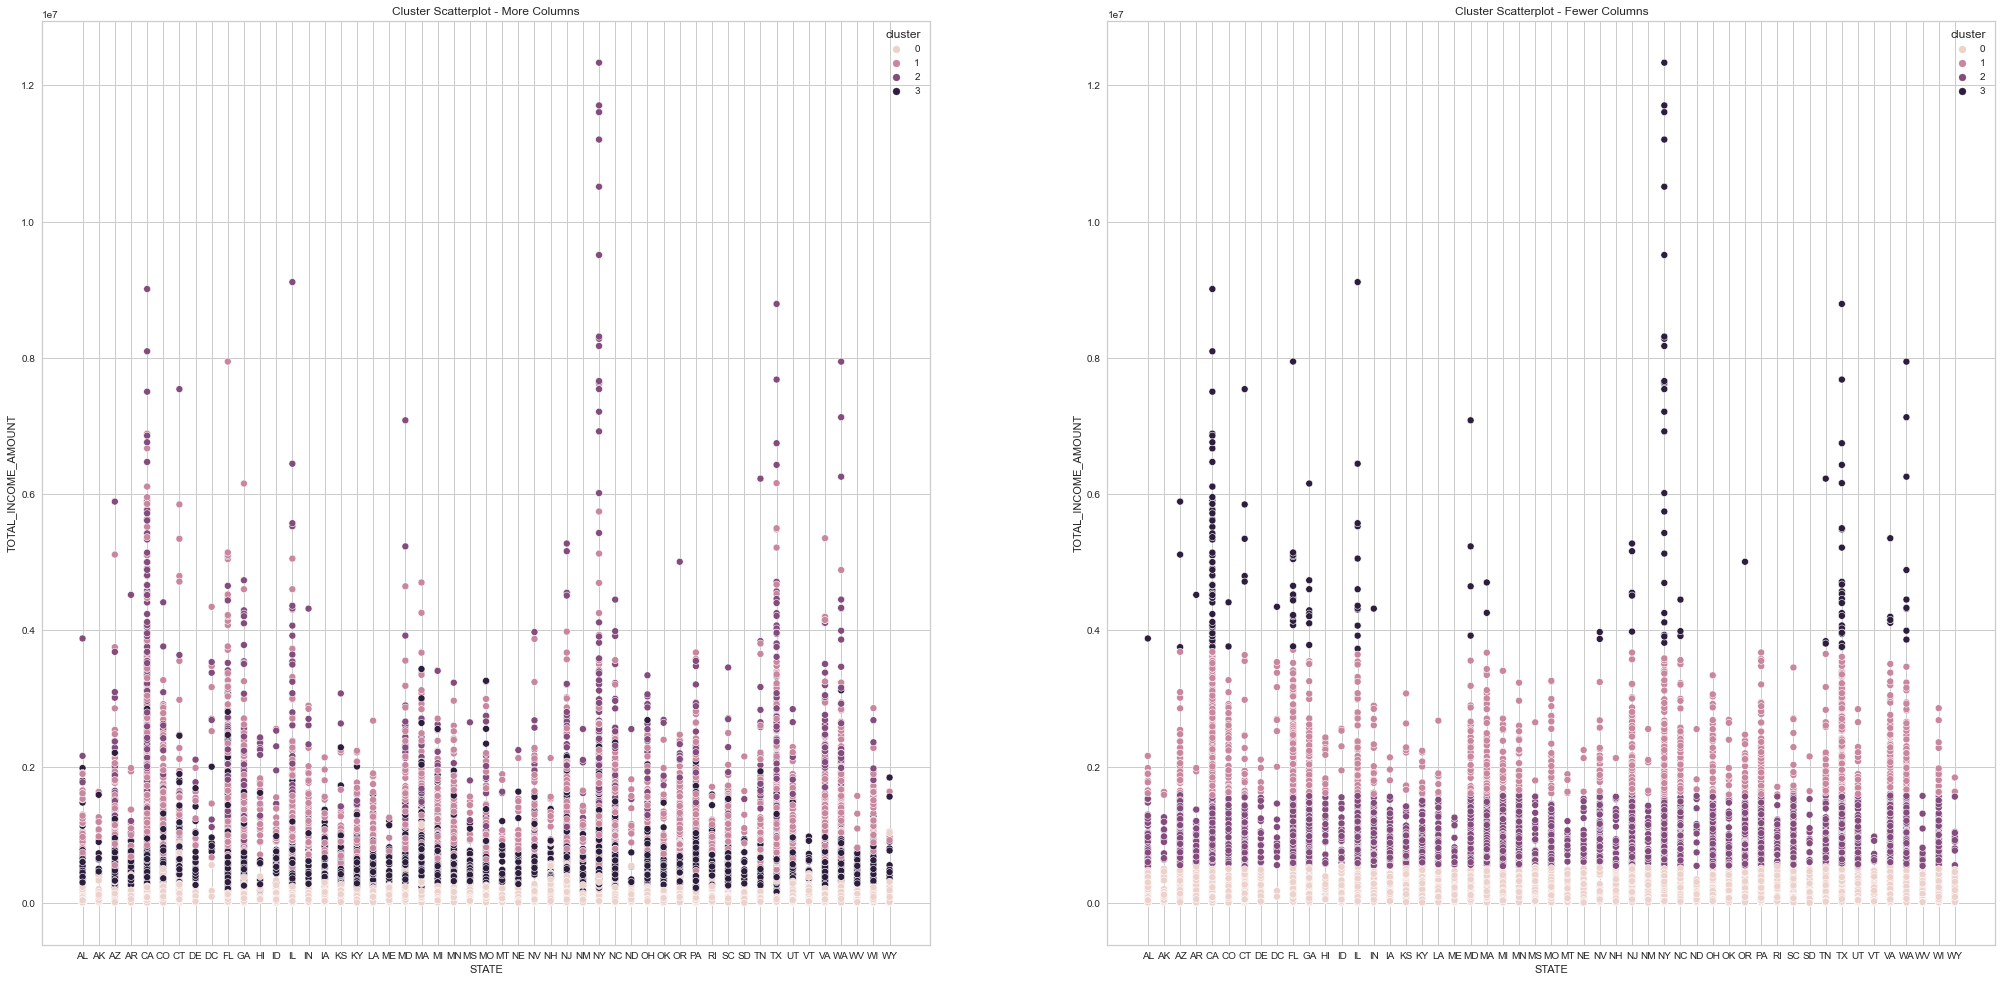

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

def kmeans_and_scatterplot(df_model_three_column, df_model_one_column):
    scaler = MinMaxScaler()

    # Model with more columns
    df_scaled_1 = scaler.fit_transform(df_model_three_column)
    kmeans_model_1 = KMeans(n_clusters=4)
    cluster_labels_1 = kmeans_model_1.fit_predict(df_scaled_1)
    df_cluster_1 = df_income_three_column.copy()
    df_cluster_1["cluster"] = cluster_labels_1

    # Model with fewer columns
    df_scaled_2 = scaler.fit_transform(df_model_one_column)
    kmeans_model_2 = KMeans(n_clusters=4)
    cluster_labels_2 = kmeans_model_2.fit_predict(df_scaled_2)
    df_cluster_2 = df_income_one_column.copy()
    df_cluster_2["cluster"] = cluster_labels_2

    # Scatter plot for first DataFrame
    fig, axes = plt.subplots(1, 2, figsize=(35, 17))
    
    sns.scatterplot(ax=axes[0], x=df_cluster_1["STATE"], y=df_cluster_1["TOTAL_INCOME_AMOUNT"], hue=df_cluster_1["cluster"], data=df_cluster_1)
    axes[0].set_title('Cluster Scatterplot - More Columns')

    sns.scatterplot(ax=axes[1], x=df_cluster_2["STATE"], y=df_cluster_2["TOTAL_INCOME_AMOUNT"], hue=df_cluster_2["cluster"], data=df_cluster_2)
    axes[1].set_title('Cluster Scatterplot - Fewer Columns')

    plt.show()

    return df_cluster_1, df_cluster_2

# Call the function with your DataFrames
df_three_column_cluster, df_one_column_cluster = kmeans_and_scatterplot(df_model_three_column, df_model_one_column)

In [56]:
df_one_column_cluster.head()

,STATE,ZIPCODE,TOTAL_INCOME_AMOUNT,cluster
1,AL,35004,317526.00,0
2,AL,35005,134803.00,0
3,AL,35006,67693.00,0
4,AL,35007,763960.00,2
5,AL,35010,463806.00,0


In [60]:
df_lat_lng = pd.read_csv("./data/zip_lat_long.csv", dtype={'ZIP': str})
df_map = pd.read_csv("./data/19zpallnoagi.csv", dtype={'ZIPCODE': str}).iloc[:,1:3]

df_map["cluster"] = df_one_column_cluster["cluster"]

df_map.dropna(inplace=True)

df_merged = pd.merge(df_map, df_lat_lng, left_on="ZIPCODE", right_on="ZIP", how='left')
df_merged.head()


,STATE,ZIPCODE,cluster,ZIP,LAT,LNG
0,AL,35004,0.00,35004,33.60,-86.49
1,AL,35005,0.00,35005,33.60,-87.00
2,AL,35006,0.00,35006,33.42,-87.21
3,AL,35007,2.00,35007,33.22,-86.80
4,AL,35010,0.00,35010,32.92,-85.94


In [62]:
import folium

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
colors = {0.0: 'red', 1.0: 'blue', 2.0: 'green', 3.0: 'yellow'} 
# Iterate through the DataFrame
for index, row in df_merged.iterrows():
    # Add a marker for each data point with different cluster colors
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=5,
        popup=f"Cluster: {row['cluster']}",
        color=colors[row['cluster']],  # Use color mapping from the colors dictionary
        fill=True,
        fill_color=colors[row['cluster']]  # Use color mapping from the colors dictionary
    ).add_to(m)